#### Importing packages

In [132]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

### Importing Committee to Candidate donations
Format: CommitteeID, CandidateID, Time, Amount

What the candidate receives.

I think this is the inweight they talk about in [8]

In [21]:
Com2Cand = np.loadtxt('/Users/vaishnan/Documents/15826/campaign-contribution-text/Com2Cand.txt',int)


### Importing Donor to Committee donations
Format: CommitteeID, DonorID, Time, Amount

What the donor organization donates.

I think is the the out-weight they talk about in [8]

In [22]:
Don2Com = np.loadtxt('/Users/vaishnan/Documents/15826/campaign-contribution-text/Don2Com.txt',int)

The max id for each object. 

In [65]:
NumCandidates = 61618
NumCommittees = 60063
NumDonors = 6368912

#### Converting the year columns to just years

In [24]:
Com2Cand[:,2]/=10000
Don2Com[:,2]/=10000

#### Select only records corresponding to 2006

In [44]:
def get_records_of_year(records, year):
    selected_rows = (records[np.array([idx for idx in range(records.shape[0]) if records[idx, 2] == year]),:])
    return selected_rows[:,np.array([0,1,3])]
    # Removes year


Com2CandFinal = get_records_of_year(Com2Cand, 2006)
Don2ComFinal = get_records_of_year(Don2Com, 2006)



In [46]:
Com2CandFinal.shape

(167902, 3)

#### Get outdegree and outweights

In [117]:
def get_degree_and_weight(records, max_index):
    # Second column is what we want to be summarized over
    summary = np.zeros((max_index+1, 2))
    # Each row is a (degree, weight)
    for i in range(records.shape[0]):
        nodeId = records[i,1]
        summary[nodeId,0] += 1
        summary[nodeId,1] += records[i,2]
    return summary

outweights = get_degree_and_weight(Don2ComFinal, NumDonors)
inweights = get_degree_and_weight(Com2CandFinal, NumCandidates)

In [119]:
min(Don2ComFinal[:,2])

-96480

### Log Log Plots for outweights and inweights

In [134]:
def plot_log_log(records):
    fig, ax = plt.subplots()
    # Remove zero values
    records = records[np.array([idx for idx in range(records.shape[0]) if records[idx, 0]>0 and records[idx,1] > 0]),:]
    #median_x, median_y = zip(*sorted((xVal, np.median([yVal for a, yVal in zip(records[:,0], records[:,1]) if xVal==a])) for xVal in set(records[:,0])))
    plt.scatter([np.log(r) for r in records[:,0]], [np.log(r) for r in  records[:,1]],s=0.5)
    # Todo add median code
    

<IPython.core.display.Javascript object>


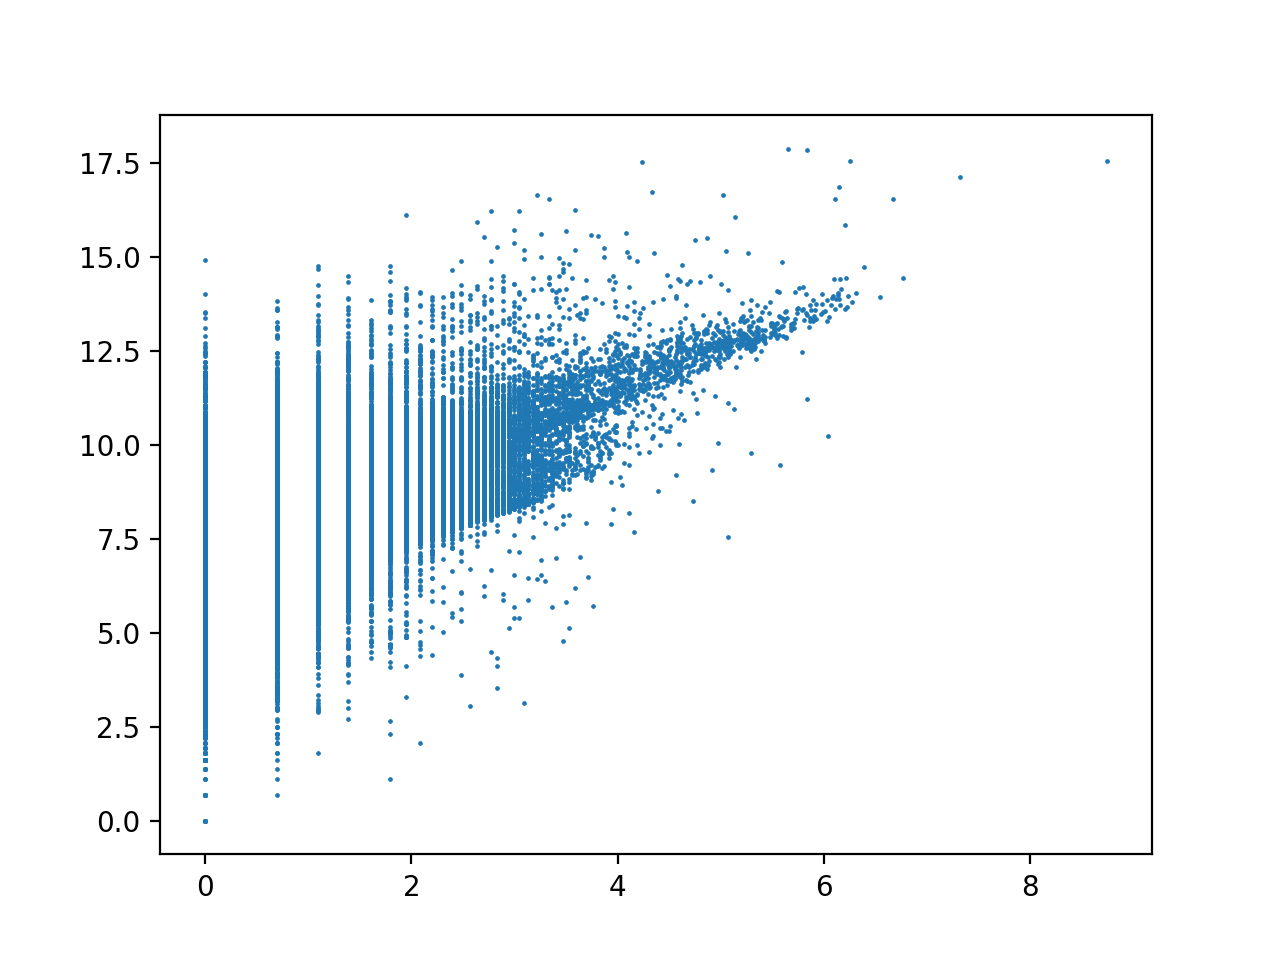

In [136]:
plot_log_log(outweights)

<IPython.core.display.Javascript object>


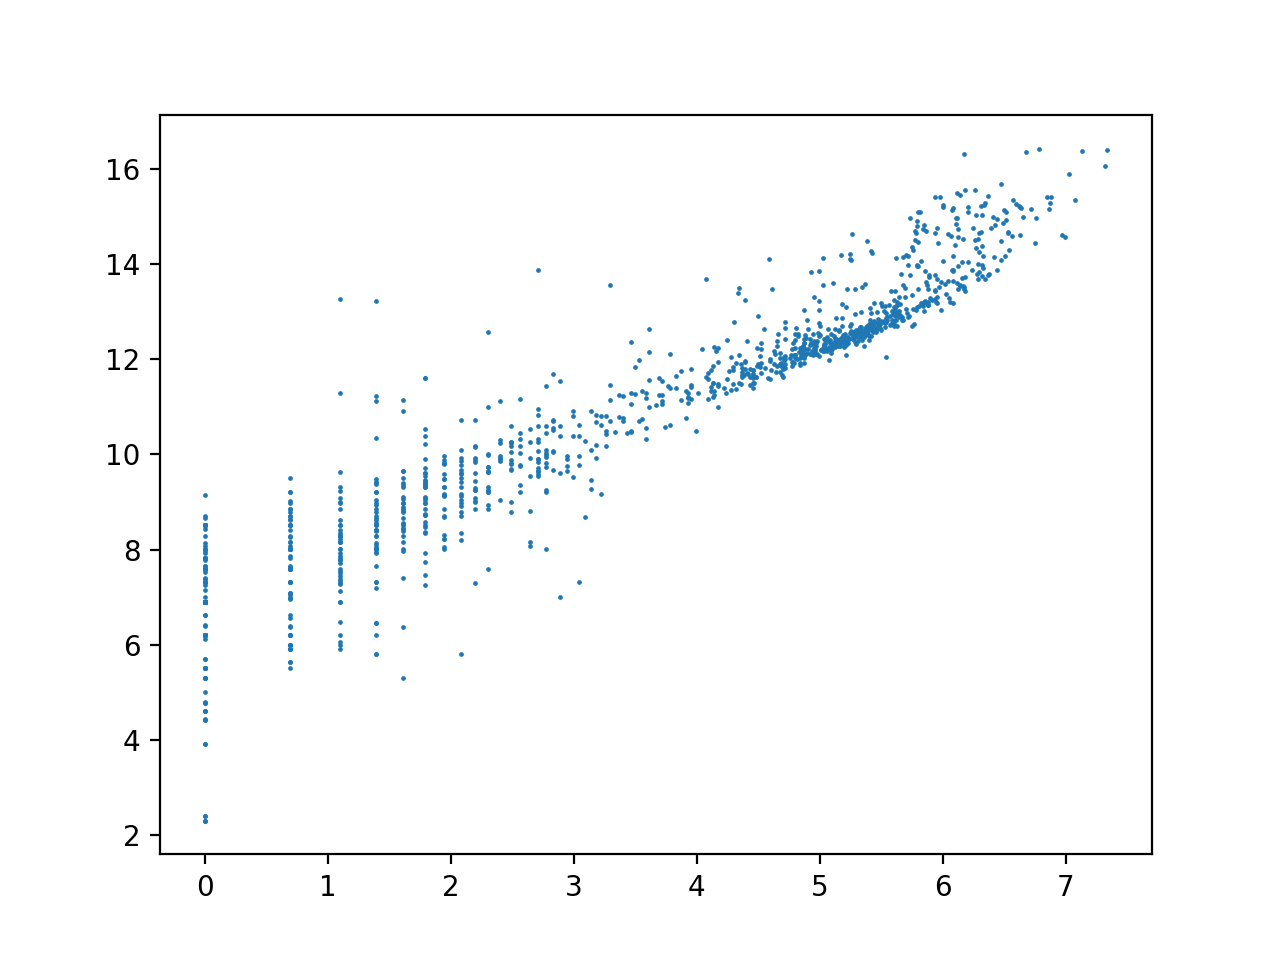

In [135]:
plot_log_log(inweights)

In [113]:
min(outweights[:,1])

-49926